# Multiplication by Neural Network

Playing with the network from Lin, H. W., Tegmark, M., & Rolnick, D. (2016). Why does deep and cheap learning work so well? Journal of Statistical Physics, 168(6), 1223–1247. https://doi.org/10.1007/s10955-017-1836-5

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exact Approximation of $u\cdot v$

In [2]:
λ = 0.1

d = 0.1

def σ(x):
    return 1 / (1 + np.exp(d - x))

σ0 = 2*np.exp(d)**2/(1 + np.exp(d))**3 - np.exp(d)/(1 + np.exp(d))**2

def µ(λ):
    return λ**(-2)/(4*σ0)

def NN_prod(u, v):
    n0 = σ( λ*u + λ*v)
    n1 = σ(-λ*u - λ*v)
    n2 = σ( λ*u - λ*v)
    n3 = σ(-λ*u + λ*v)
    
    return µ(λ)*(n0 + n1 - n2 - n3)

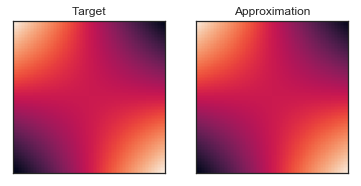

In [3]:
def compare(approximator):
    x = np.linspace(-2, 2, 100)
    approx = np.zeros((len(x), len(x)))
    for i, j in itertools.combinations_with_replacement(range(len(x)), 2):
        approx[i, j] = approximator(x[i], x[j])
        approx[j, i] = approximator(x[j], x[i])

    vmin = np.min(np.append(x, approx))
    vmax = np.max(np.append(x, approx))

    ax = plt.subplot(1, 2, 1)
    ax.set_title('Target')
    ax.imshow(np.outer(x, x), vmin=vmin, vmax=vmax)
    ax.set_xticks([])
    ax.set_yticks([])

    ax = plt.subplot(1, 2, 2)
    ax.set_title('Approximation')
    ax.imshow(approx, vmin=vmin, vmax=vmax)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()


compare(NN_prod)

## Learning $u\cdot v$

In [4]:

def σ(x):
    return 1 / (1 + np.exp(d - x))


def NN_prod(u, v):
    n0 = σ( λ*u + λ*v)
    n1 = σ(-λ*u - λ*v)
    n2 = σ( λ*u - λ*v)
    n3 = σ(-λ*u + λ*v)
    
    return µ*(n0 + n1 - n2 - n3)


def dfdµ(u, v):
    n0 = σ( λ*u + λ*v)
    n1 = σ(-λ*u - λ*v)
    n2 = σ( λ*u - λ*v)
    n3 = σ(-λ*u + λ*v)
    
    return n0 + n1 - n2 - n3


def dσdx(x):
    return np.exp(d - x) / (1 + np.exp(d - x))**2

def dfdλ(u, v):
    dn0dλ = dσdx( λ*u + λ*v)*( u + v)
    dn1dλ = dσdx(-λ*u - λ*v)*(-u - v)
    dn2dλ = dσdx( λ*u - λ*v)*( u - v)
    dn3dλ = dσdx(-λ*u + λ*v)*(-u + v)
    
    return µ*(dn0dλ + dn1dλ - dn2dλ - dn3dλ)

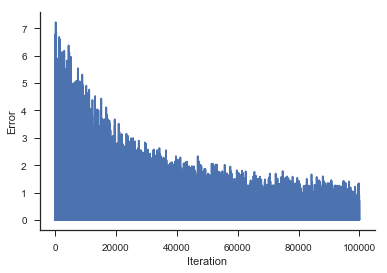

In [5]:
µ, λ = np.random.rand(2) 
iterations = int(1e5)
errors = np.zeros(iterations)
for i in range(iterations):
    u, v = 4*np.random.rand(2) - 2
    prediction = NN_prod(u, v)
    errors[i] = (u*v - prediction)**2/2
    µ, λ = np.array((µ, λ)) + 0.05*(u*v - prediction)*np.array((dfdµ(u, v), dfdλ(u, v)))

plt.plot(errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
sns.despine()
plt.show()

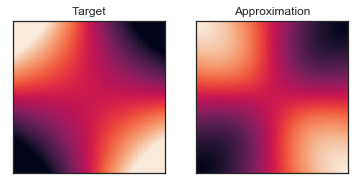

In [6]:
compare(NN_prod)